In [1]:
%matplotlib inline
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [3]:
#Files to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
#Inspect city data
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get the unique values of the type of city.
city_types=city_data_df["type"].unique()

In [10]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

In [11]:
#Inspect Ride Data
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
#Merge city and ride data
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
#Create separate dataframes for each city types

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


In [16]:
# Get the number of rides for each city, by city type.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [17]:
#Get average fare for each city, by city types
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [18]:
#Get average number of drivers for each city, by city types
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

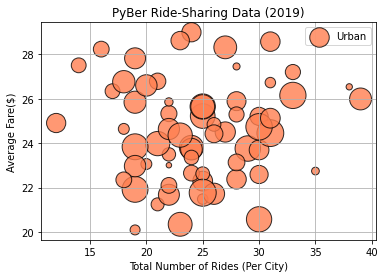

In [19]:
#Create Urban Cities scatter plot
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1,
            alpha=0.8, label = "Urban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

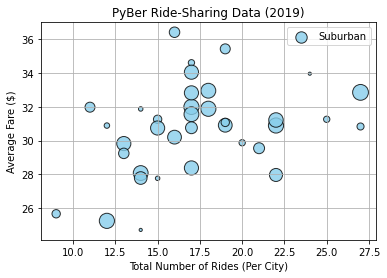

In [20]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

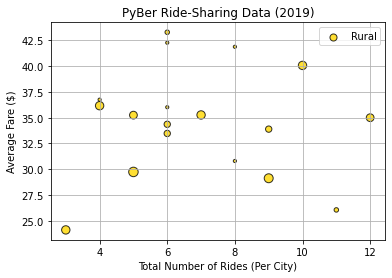

In [21]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()


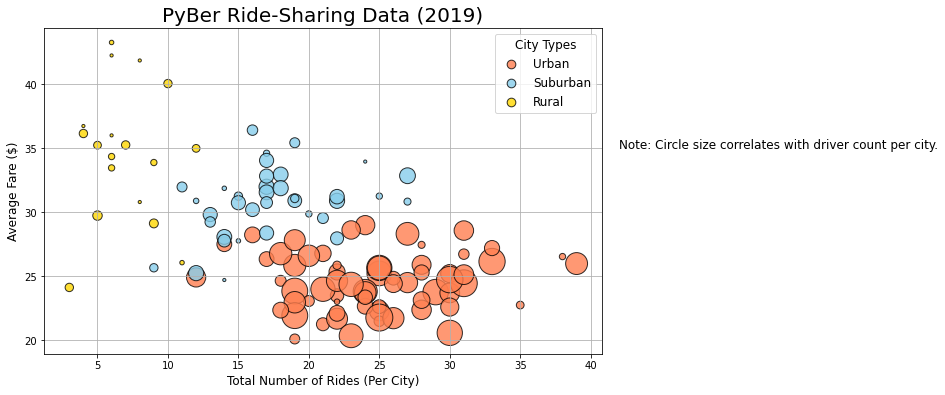

In [22]:
# Add the scatter charts for each type of city.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend with markers same size
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

In [23]:
# Get summary statistics.
urban_cities_df.describe()


,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [24]:
suburban_cities_df.describe()


,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [25]:
rural_cities_df.describe()


,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [26]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [27]:
# Get summary statistics.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [28]:
# Get summary statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [29]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [30]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [31]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [32]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [33]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [34]:
#Mode for rural cities

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [35]:
# Get the fares for the cities, by type.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [36]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [37]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [38]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [39]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [40]:
#Central tendencies for driver counts for urban cities
mean_urban_driver_count = np.mean(urban_drivers)
print(f"The mean for the driver counts for urban trips is {mean_urban_driver_count:.2f}.")

median_urban_driver_count = np.median(urban_drivers)
print(f"The median for the driver counts for urban trips is {median_urban_driver_count}.")

mode_urban_driver_count = sts.mode(urban_drivers)
print(f"The mode for the driver counts for urban trips is {mode_urban_driver_count}.")

The mean for the driver counts for urban trips is 36.68.
The median for the driver counts for urban trips is 37.0.
The mode for the driver counts for urban trips is ModeResult(mode=array([39]), count=array([86])).


In [41]:
#Central tendencies for driver counts for suburban cities
mean_suburban_driver_count = np.mean(suburban_drivers)
print(f"The mean for the driver counts for suburban trips is {mean_suburban_driver_count:.2f}.")

median_suburban_driver_count = np.median(suburban_drivers)
print(f"The median for the driver counts for suburban trips is {median_suburban_driver_count}.")

mode_suburban_driver_count = sts.mode(suburban_drivers)
print(f"The mode for the driver counts for suburban trips is {mode_suburban_driver_count}.")

The mean for the driver counts for suburban trips is 13.71.
The median for the driver counts for suburban trips is 16.0.
The mode for the driver counts for suburban trips is ModeResult(mode=array([20]), count=array([79])).


In [42]:
#Central tendencies for driver counts for rural cities
mean_rural_driver_count = np.mean(rural_drivers)
print(f"The mean for the driver counts for rural trips is {mean_rural_driver_count:.2f}.")

median_rural_driver_count = np.median(rural_drivers)
print(f"The median for the driver counts for rural trips is {median_rural_driver_count}.")

mode_rural_driver_count = sts.mode(rural_drivers)
print(f"The mode for the driver counts for rural trips is {mode_rural_driver_count}.")

The mean for the driver counts for rural trips is 4.30.
The median for the driver counts for rural trips is 4.0.
The mode for the driver counts for rural trips is ModeResult(mode=array([1]), count=array([32])).


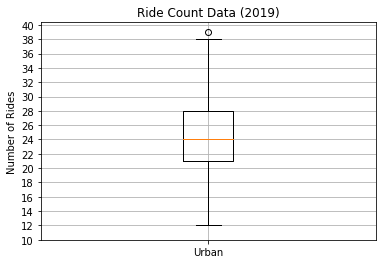

In [43]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

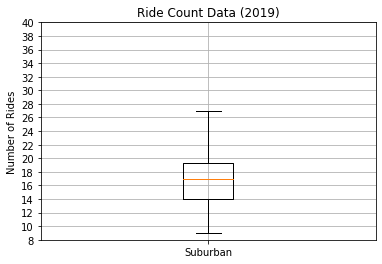

In [44]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(8, 41, step=2.0))
ax.grid()
plt.show()

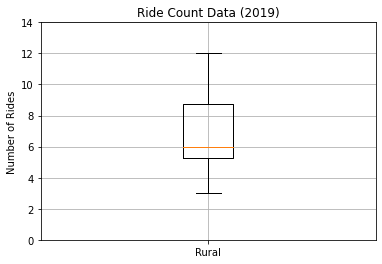

In [45]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 16, step=2.0))
ax.grid()
plt.show()

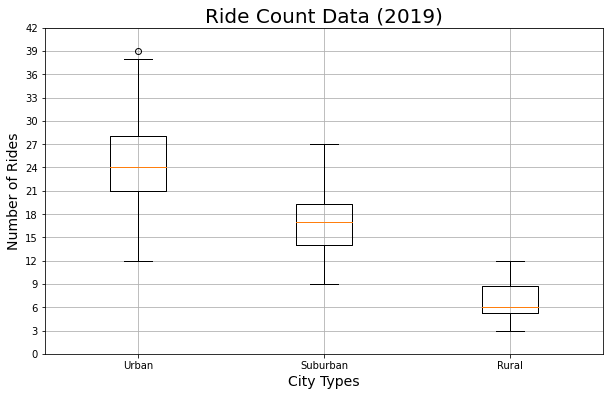

In [46]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [47]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


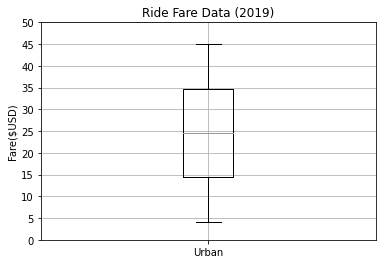

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [48]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()


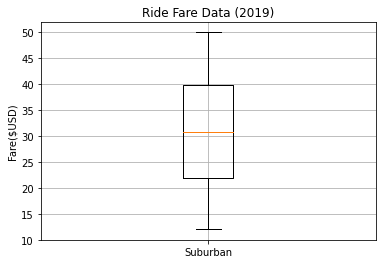

In [49]:
# Create a box-and-whisker plot for the suburban cities average fare.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(10, 55, step=5.0))
ax.grid()
plt.show()

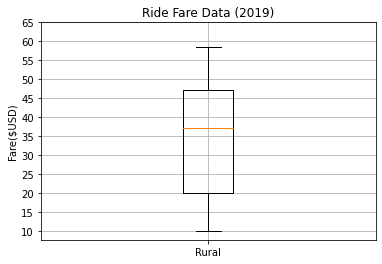

In [50]:
# Create a box-and-whisker plot for the rural cities average fare.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(10,70, step=5.0))
ax.grid()
plt.show()

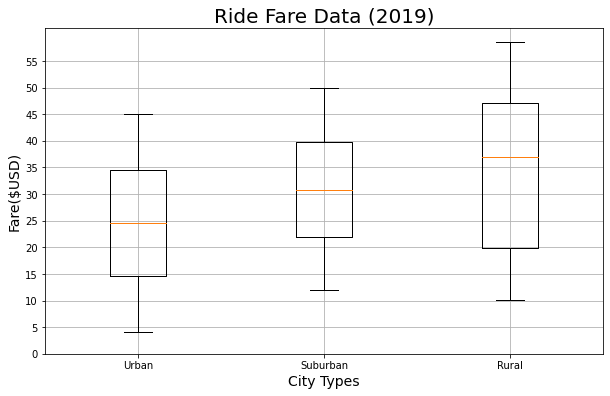

In [51]:
# Add all fare box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

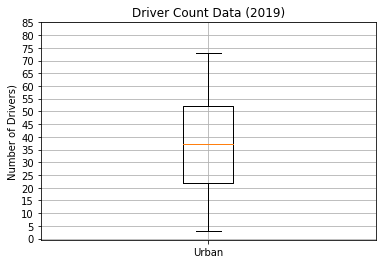

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [52]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()


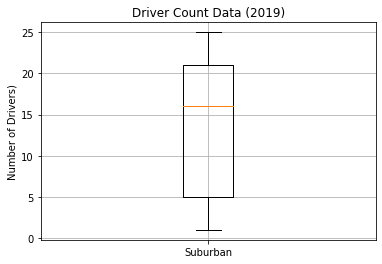

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [53]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 30, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()


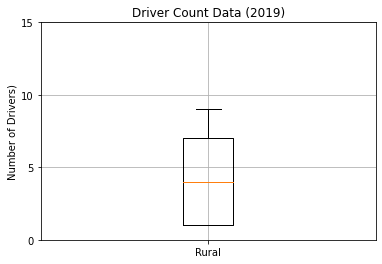

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [54]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 20, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()


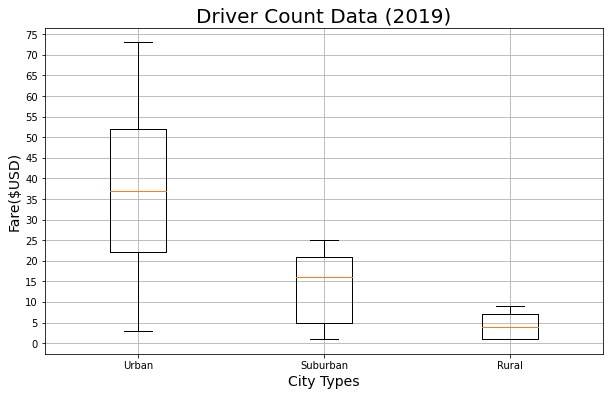

In [55]:
# Add all driver count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [56]:
#Figure 5. Percentage of fares by city type
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
#Get the sum of all fares
total_fares = pyber_data_df["fare"].sum()
#Calculate percentages of total by type.
type_percents = sum_fares_by_type/total_fares *100


#Alternate code
#Calculate the percentage of fare for each city type.
#type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()


In [61]:
#Add matplotlib
import matplotlib as mpl

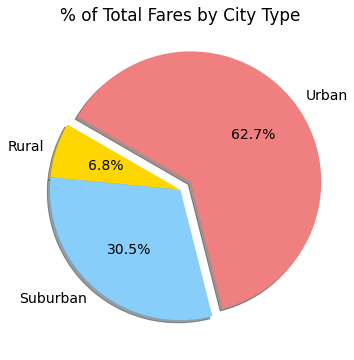

In [78]:
# Build the percentage of fares by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
#Show figure
plt.show()

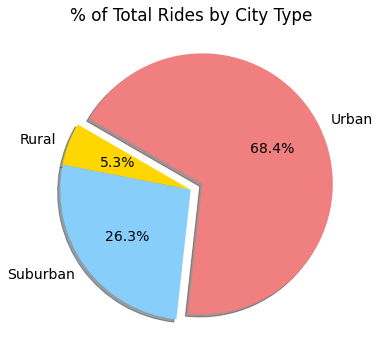

In [77]:
#Figure 6. Percentage of rides by city type
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()

plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
#plt.savefig("analysis/Fig6.png")
#Show figure
plt.show()


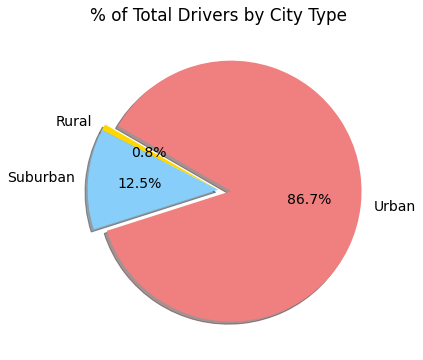

In [76]:
#Figure 7. Percentage of drivers by city type
driver_percents = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"] / pyber_data_df["driver_count"].sum()

plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
#plt.savefig("analysis/Fig7.png")
#Show figure
plt.show()